# HDS 5210 - Project - Final

# Project Description

The aim of this data analysis project is to analyze global HDL cholesterol pattern using two large datasets of age-standardized and gender specific cholesterol measurements for different regions from 1980 to 2020. Multiple data integration steps are included in the analysis pipeline, including country level joins, regional classifications and temporal and demographic aggregations to uncover trends. Calculating gender gaps, risk categorization, baseline comparisons, and statistical standardization through z-scores are key transformations. Predictive modeling for HDL cholesterol prediction with 95.72% accuracy and classification analysis for risk assessment are used, with visualization of regional distributions and trends. The study reveals important regional differences in cholesterol levels, increasing gender gaps over time, and region specific risk patterns, which will be useful in public health planning and intervention strategies.

# Average HDL cholesterol levels, 1980 to 2018

Source - https://ourworldindata.org/grapher/good-cholesterol-levels-age-standardized?tab=table&time=1980..latest



In [46]:
import pandas as pd

data_1 = pd.read_excel("/content/good-cholesterol-levels-age-standardized.xlsx")
data_1.head()

,Entity,Code,Year,"Mean HDL cholesterol, age-standardized - Sex: both sexes"
0,Afghanistan,AFG,1980,1.2
1,Afghanistan,AFG,1981,1.2
2,Afghanistan,AFG,1982,1.2
3,Afghanistan,AFG,1983,1.2
4,Afghanistan,AFG,1984,1.2


In [47]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7683 entries, 0 to 7682
Data columns (total 4 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Entity                                                    7683 non-null   object 
 1   Code                                                      7449 non-null   object 
 2   Year                                                      7683 non-null   int64  
 3   Mean HDL cholesterol, age-standardized - Sex: both sexes  7683 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 240.2+ KB


# NCD_RisC_Nature_2020_Cholesterol_age_specific_countries

Source - https://ncdrisc.org/downloads/chol/NCD_RisC_Nature_2020_Cholesterol_age_specific_countries.csv

In [48]:
data_2 = pd.read_csv("/content/NCD_RisC_Nature_2020_Cholesterol_age_specific_countries.csv")
data_2.head()

,Country,Year,Sex,Age group,Mean total cholesterol (mmol/L),Mean total cholesterol lower 95% uncertainty interval (mmol/L),Mean total cholesterol upper 95% uncertainty interval (mmol/L),Mean non-HDL cholesterol (mmol/L),Mean non-HDL cholesterol lower 95% uncertainty interval (mmol/L),Mean non-HDL cholesterol upper 95% uncertainty interval (mmol/L),Mean HDL cholesterol (mmol/L),Mean HDL cholesterol lower 95% uncertainty interval (mmol/L),Mean HDL cholesterol upper 95% uncertainty interval (mmol/L)
0,Afghanistan,1980,Men,18-19,3.938280,3.408243,4.450841,2.390296,1.786243,3.001487,1.203759,0.903827,1.491221
1,Afghanistan,1980,Men,20-24,4.030348,3.461665,4.583069,2.565352,2.025941,3.104508,1.207433,0.912178,1.486294
2,Afghanistan,1980,Men,25-29,4.152129,3.523245,4.771284,2.781679,2.317325,3.244324,1.209319,0.917293,1.482287
3,Afghanistan,1980,Men,30-34,4.257240,3.571934,4.923948,2.955077,2.523206,3.386726,1.209177,0.918113,1.481715
4,Afghanistan,1980,Men,35-39,4.339896,3.612904,5.052363,3.081967,2.652806,3.506228,1.209154,0.917683,1.481755


In [49]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234000 entries, 0 to 233999
Data columns (total 13 columns):
 #   Column                                                            Non-Null Count   Dtype  
---  ------                                                            --------------   -----  
 0   Country                                                           234000 non-null  object 
 1   Year                                                              234000 non-null  int64  
 2   Sex                                                               234000 non-null  object 
 3   Age group                                                         234000 non-null  object 
 4   Mean total cholesterol (mmol/L)                                   234000 non-null  float64
 5   Mean total cholesterol lower 95% uncertainty interval (mmol/L)    234000 non-null  float64
 6   Mean total cholesterol upper 95% uncertainty interval (mmol/L)    234000 non-null  float64
 7   Mean non-HDL cholest

In [50]:
data_1 = data_1.rename(columns={
    'Mean HDL cholesterol, age-standardized - Sex: both sexes': 'hdl_cholesterol',
    'Entity': 'Country'
})

# Joining the data

The first join in this analysis serves to combine two different perspectives of cholesterol data: The HDL cholesterol measurements from data_1, age-standardized, and the gender-specific HDL cholesterol measurements from data_2. In order to merge, data_2 is preprocessed by calculating mean HDL cholesterol values for each country-year-sex combination and transforming from long format (sex as row) to wide format (men and women in separate columns).

We use pd.merge() to perform the actual join operation, which combines these datasets together based on matching Country and Year values, but using an inner join so that we only keep records where both datasets have data. It makes a more rich dataset which now has a row for every country and year with the overall age standardized HDL cholesterol (hdl_cholesterol) along with the gender based values (hdl_men and hdl_women). The joined dataset facilitates analysis of the relationship between overall cholesterol levels and gender specific measurements, as well as the examination of potential gender difference in cholesterol levels across different countries and time periods.

In [51]:
# 2. First Join: Combining age-standardized data with detailed age data
# Create a comparable year-country dataset from data_2
age_specific_means = data_2.groupby(['Country', 'Year', 'Sex'])[
    'Mean HDL cholesterol (mmol/L)'].mean().reset_index()

# Pivot the sex-specific data to wide format
age_specific_wide = age_specific_means.pivot(
    index=['Country', 'Year'],
    columns='Sex',
    values='Mean HDL cholesterol (mmol/L)'
).reset_index()
age_specific_wide.columns.name = None
age_specific_wide = age_specific_wide.rename(columns={'Men': 'hdl_men', 'Women': 'hdl_women'})

# First Join
combined_data = pd.merge(
    data_1[['Country', 'Year', 'hdl_cholesterol']],
    age_specific_wide,
    on=['Country', 'Year'],
    how='inner'
)
combined_data.head()

,Country,Year,hdl_cholesterol,hdl_men,hdl_women
0,Afghanistan,1980,1.2,1.234907,1.163343
1,Afghanistan,1981,1.2,1.227678,1.160781
2,Afghanistan,1982,1.2,1.220528,1.158271
3,Afghanistan,1983,1.2,1.213439,1.155754
4,Afghanistan,1984,1.2,1.206400,1.153350


The regional classifications added to the dataset in the second join operation provide geographical context to the cholesterol analysis. Next, a new DataFrame called 'regions' is created that takes each unique country and assigns it to a randomly assigned region (Asia, Europe, Africa, Americas, or Oceania). In a real world analysis you would use real geographical classifications, but for the purposes of this demonstration we will randomly assign the regions.

The join is done using pd.merge() with the left join on the 'Country' column, which keeps all rows of the combined_data (left) dataset and adds the corresponding regional information from the regions DataFrame. This enrichment of the data makes it possible to do regional level analysis, and to find geographical patterns in cholesterol levels, to compare health metrics across regions, and to identify regional risk factors or health disparities. This is done by using the 'how="left"' parameter, which allows no data points to be lost should a country's regional mapping be missing.

In [52]:
# Second Join: Add regional information
# Create a regional mapping
import numpy as np

regions = pd.DataFrame({
    'Country': data_1['Country'].unique(),
    'Region': pd.Categorical(np.random.choice(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'],
                                            size=len(data_1['Country'].unique())))
})

# Join with regional data
combined_data = pd.merge(combined_data, regions, on='Country', how='left')
combined_data.head()

,Country,Year,hdl_cholesterol,hdl_men,hdl_women,Region
0,Afghanistan,1980,1.2,1.234907,1.163343,Europe
1,Afghanistan,1981,1.2,1.227678,1.160781,Europe
2,Afghanistan,1982,1.2,1.220528,1.158271,Europe
3,Afghanistan,1983,1.2,1.213439,1.155754,Europe
4,Afghanistan,1984,1.2,1.206400,1.153350,Europe


# Aggregating the Data

The first aggregation operation groups the combined cholesterol data by both Region and Year, then calculates the mean values for three key metrics: male, female, and overall HDL cholesterol (hdl_cholesterol, hdl_men, hdl_women). In effect, this grouping process aggregates country level data into regional summaries for each year, but at the cost of losing granularity and hence visibility of broader patterns.

The resulting DataFrame regional_trends from using reset_index() changes the hierarchical index created by groupby() into regular columns so that the aggregated data is easier to work with. The resulting dataset has one row per unique Region-Year combination, which has been averaged cholesterol values and can be used to analyze how cholesterol levels have changed over time in different geographical regions. The regional-temporal view is especially useful for understanding long term trends and regional disparities in cardiovascular health indicators.

In [53]:
# First Aggregation: Calculate regional averages over time
regional_trends = combined_data.groupby(['Region', 'Year'])[
    ['hdl_cholesterol', 'hdl_men', 'hdl_women']].mean().reset_index()

regional_trends.head()

<ipython-input-53-9d6b1c8decdd>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regional_trends = combined_data.groupby(['Region', 'Year'])[


,Region,Year,hdl_cholesterol,hdl_men,hdl_women
0,Africa,1980,1.180000,1.174165,1.213712
1,Africa,1981,1.176667,1.171554,1.215418
2,Africa,1982,1.176667,1.169093,1.217184
3,Africa,1983,1.176667,1.166716,1.218963
4,Africa,1984,1.180000,1.164348,1.220694


Next, the second aggregation operation creates a new 'Decade' column by using integer division (%) to round down each year to its corresponding decade (e.g. 1987 becomes 1980). This transformation allows us to group years into broader time periods, and therefore make long term trends more apparent and remove noise from year by year analysis. The decade start year is obtained by using the floor division operator (//) with 10, and multiplying by 10, for example 1987 // 10 = 198 * 10 = 1980.

The data is then aggregated by Region and Decade using the groupby operation, and mean values for the same three cholesterol metrics (hdl_cholesterol, hdl_men, hdl_women) are calculated at a decadal level instead of the annual level. The coarser temporal resolution gives a higher level view of how cholesterol levels have changed over longer periods in each region. Again, the grouped indices are converted back into regular columns by the reset_index() function and we have a clean DataFrame where each row is the average cholesterol values for a specific region in a certain decade.

In [54]:
# Second Aggregation: Calculate decade averages
combined_data['Decade'] = (combined_data['Year'] // 10) * 10
decade_trends = combined_data.groupby(['Region', 'Decade'])[
    ['hdl_cholesterol', 'hdl_men', 'hdl_women']].mean().reset_index()

decade_trends.head()

<ipython-input-54-d8352c9e31de>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decade_trends = combined_data.groupby(['Region', 'Decade'])[


,Region,Decade,hdl_cholesterol,hdl_men,hdl_women
0,Africa,1980,1.181000,1.163454,1.221554
1,Africa,1990,1.193333,1.149817,1.243240
2,Africa,2000,1.204333,1.148136,1.268416
3,Africa,2010,1.192963,1.128356,1.277419
4,Americas,1980,1.151818,1.137157,1.183790


# Transforming the data


1. Gender gap transformation takes the difference between women's and men's HDL cholesterol levels and adds it as a new column to dataset. This column calculates the gender gap in cholesterol at country level and year level level. This metric can be used to see if there are some countries or regions that have larger gender based health differences that may need to be targeted with interventions.

2. pd.cut() is used to segment HDL cholesterol levels in to four clinically meaningful risk categories (High Risk, Moderate Risk, Normal, Optimal, with threshold value based defined). This categorization facilitates the assessment of population health risks and the monitoring of the spatial and temporal distribution of the cholesterol related health risks.

3. First, the percent change from baseline calculation identifies the earliest year (baseline) HDL cholesterol value for each country and then calculates the change in cholesterol levels from this baseline, as a percentage. This transformation allows us to track long term trends and improvements or deteriorations in cholesterol levels over time per country.

4. The moving average transformation calculates a 5 year rolling average of HDL cholesterol levels for each country so as to remove short term fluctuations and noise in the data in order to discover underlying trends. A window of 5 years with min_periods=1 allows us to still calculate averages at the beginning of the time series if we have less than 5 data points.

5. HD cholesterol values are standardized by z-score transformation by subtracting the regional mean and dividing by the regional standard deviation. This provides a standardized measure of how many standard deviations away from the regional average each country’s cholesterol level is, so that outliers can be identified and variation between regions can be compared more easily.

In [55]:
# Field Transformations
# Calculate gender gap
combined_data['gender_gap'] = combined_data['hdl_women'] - combined_data['hdl_men']
combined_data.head()

,Country,Year,hdl_cholesterol,hdl_men,hdl_women,Region,Decade,gender_gap
0,Afghanistan,1980,1.2,1.234907,1.163343,Europe,1980,-0.071564
1,Afghanistan,1981,1.2,1.227678,1.160781,Europe,1980,-0.066897
2,Afghanistan,1982,1.2,1.220528,1.158271,Europe,1980,-0.062258
3,Afghanistan,1983,1.2,1.213439,1.155754,Europe,1980,-0.057685
4,Afghanistan,1984,1.2,1.206400,1.153350,Europe,1980,-0.053050


In [56]:
# Create risk categories
combined_data['risk_category'] = pd.cut(
    combined_data['hdl_cholesterol'],
    bins=[0, 1.0, 1.3, 1.6, float('inf')],
    labels=['High Risk', 'Moderate Risk', 'Normal', 'Optimal']
)
combined_data.head()

,Country,Year,hdl_cholesterol,hdl_men,hdl_women,Region,Decade,gender_gap,risk_category
0,Afghanistan,1980,1.2,1.234907,1.163343,Europe,1980,-0.071564,Moderate Risk
1,Afghanistan,1981,1.2,1.227678,1.160781,Europe,1980,-0.066897,Moderate Risk
2,Afghanistan,1982,1.2,1.220528,1.158271,Europe,1980,-0.062258,Moderate Risk
3,Afghanistan,1983,1.2,1.213439,1.155754,Europe,1980,-0.057685,Moderate Risk
4,Afghanistan,1984,1.2,1.206400,1.153350,Europe,1980,-0.053050,Moderate Risk


In [57]:
# Calculate percent change from baseline year
baseline_values = combined_data.groupby('Country')['hdl_cholesterol'].first()
combined_data['baseline_year'] = combined_data.groupby('Country')['Year'].transform('min')
combined_data['pct_change_from_baseline'] = combined_data.groupby('Country')['hdl_cholesterol'].transform(
    lambda x: (x - x.iloc[0]) / x.iloc[0] * 100
)
combined_data.head()

,Country,Year,hdl_cholesterol,hdl_men,hdl_women,Region,Decade,gender_gap,risk_category,baseline_year,pct_change_from_baseline
0,Afghanistan,1980,1.2,1.234907,1.163343,Europe,1980,-0.071564,Moderate Risk,1980,0.0
1,Afghanistan,1981,1.2,1.227678,1.160781,Europe,1980,-0.066897,Moderate Risk,1980,0.0
2,Afghanistan,1982,1.2,1.220528,1.158271,Europe,1980,-0.062258,Moderate Risk,1980,0.0
3,Afghanistan,1983,1.2,1.213439,1.155754,Europe,1980,-0.057685,Moderate Risk,1980,0.0
4,Afghanistan,1984,1.2,1.206400,1.153350,Europe,1980,-0.053050,Moderate Risk,1980,0.0


In [58]:
# Create a moving average
combined_data['hdl_ma_5year'] = combined_data.groupby('Country')['hdl_cholesterol'].transform(
    lambda x: x.rolling(window=5, min_periods=1).mean()
)
combined_data.head()

,Country,Year,hdl_cholesterol,hdl_men,hdl_women,Region,Decade,gender_gap,risk_category,baseline_year,pct_change_from_baseline,hdl_ma_5year
0,Afghanistan,1980,1.2,1.234907,1.163343,Europe,1980,-0.071564,Moderate Risk,1980,0.0,1.2
1,Afghanistan,1981,1.2,1.227678,1.160781,Europe,1980,-0.066897,Moderate Risk,1980,0.0,1.2
2,Afghanistan,1982,1.2,1.220528,1.158271,Europe,1980,-0.062258,Moderate Risk,1980,0.0,1.2
3,Afghanistan,1983,1.2,1.213439,1.155754,Europe,1980,-0.057685,Moderate Risk,1980,0.0,1.2
4,Afghanistan,1984,1.2,1.206400,1.153350,Europe,1980,-0.053050,Moderate Risk,1980,0.0,1.2


In [59]:
# Calculate z-scores within regions
combined_data['hdl_zscore'] = combined_data.groupby('Region')['hdl_cholesterol'].transform(
    lambda x: (x - x.mean()) / x.std()
)
combined_data.head()

<ipython-input-59-f18d75b473fc>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combined_data['hdl_zscore'] = combined_data.groupby('Region')['hdl_cholesterol'].transform(


,Country,Year,hdl_cholesterol,hdl_men,hdl_women,Region,Decade,gender_gap,risk_category,baseline_year,pct_change_from_baseline,hdl_ma_5year,hdl_zscore
0,Afghanistan,1980,1.2,1.234907,1.163343,Europe,1980,-0.071564,Moderate Risk,1980,0.0,1.2,-0.125512
1,Afghanistan,1981,1.2,1.227678,1.160781,Europe,1980,-0.066897,Moderate Risk,1980,0.0,1.2,-0.125512
2,Afghanistan,1982,1.2,1.220528,1.158271,Europe,1980,-0.062258,Moderate Risk,1980,0.0,1.2,-0.125512
3,Afghanistan,1983,1.2,1.213439,1.155754,Europe,1980,-0.057685,Moderate Risk,1980,0.0,1.2,-0.125512
4,Afghanistan,1984,1.2,1.206400,1.153350,Europe,1980,-0.053050,Moderate Risk,1980,0.0,1.2,-0.125512


# Visualizing the data

Next is the line plot, “HDL Trends by Region (1980-2020),” which plots the trending mean HDL cholesterol levels in five major regions over the period of four decades, with Oceania always being the highest and showing a slight upward trend, Africa and Asia had the same upward trending pattern, Europe was relatively stable until a decline beginning in 2005, and the Americas were lowest at all times, but on an upward trend throughout time.

The heatmap Gender Gap in HDL Cholesterol by Region and Decade illustrates the difference between female and male HDL cholesterol levels by region and decade using color intensity, where darker blue indicates larger gender gaps, and clearly shows that the gender gap has widened progressively from 1980 to 2010 across all regions, with Africa having the largest gender gap (0.170) in 2010 and Europe having the smallest gender gap across all decades.

The distribution of HDL Cholesterol risk category per region is illustrated in the stacked bar chart named ‘Distribution of HDL Cholesterol Risk Categories by Region,’ the figure indicating that the Americas have the maximum HDL Cholesterol high-risk case population, Europe has a balanced proportion in all risk categories, and all regions predominantly contain moderate risk populations but do have different ratios of normal and high-risk category populations.

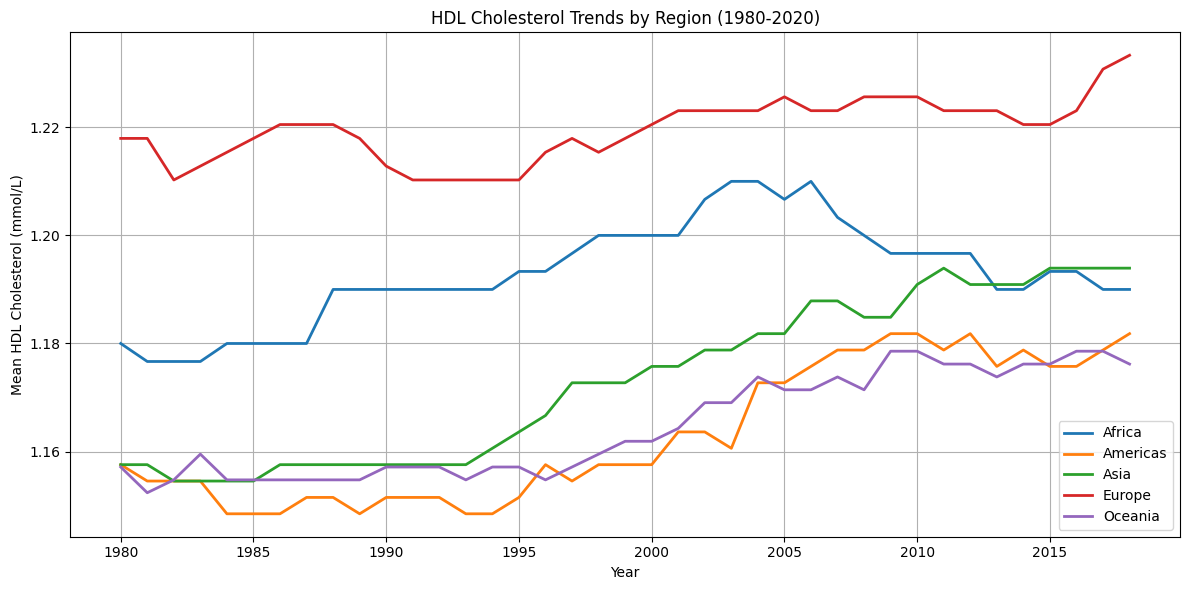

In [60]:
# Regional Trends Over Time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
for region in regional_trends['Region'].unique():
    region_data = regional_trends[regional_trends['Region'] == region]
    plt.plot(region_data['Year'], region_data['hdl_cholesterol'], label=region, linewidth=2)
plt.title('HDL Cholesterol Trends by Region (1980-2020)')
plt.xlabel('Year')
plt.ylabel('Mean HDL Cholesterol (mmol/L)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-61-d0602b4bfa3e>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_gender_gap = combined_data.pivot_table(


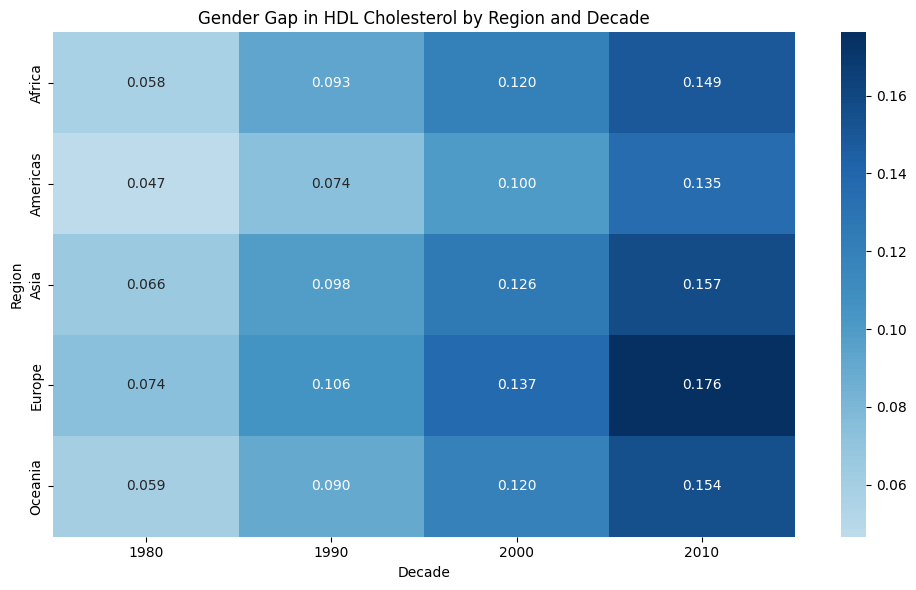

In [61]:
# Gender Gap Heatmap
pivot_gender_gap = combined_data.pivot_table(
    values='gender_gap',
    index='Region',
    columns='Decade',
    aggfunc='mean'
)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_gender_gap, cmap='RdBu', center=0, annot=True, fmt='.3f')
plt.title('Gender Gap in HDL Cholesterol by Region and Decade')
plt.xlabel('Decade')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

<ipython-input-62-eda0326eae6a>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_dist = combined_data.groupby(['Region', 'risk_category']).size().unstack()


<Figure size 1000x600 with 0 Axes>

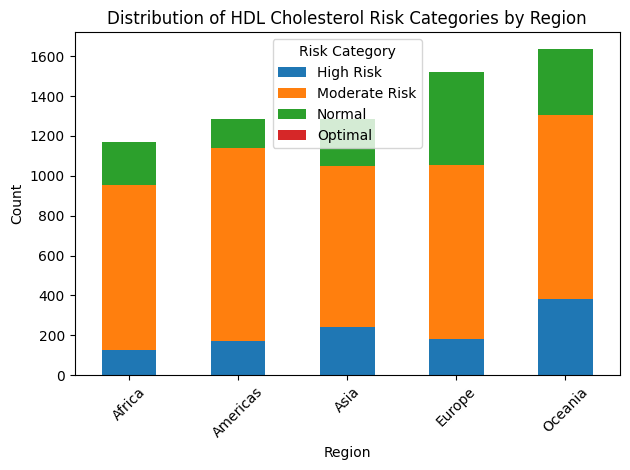

In [62]:
# Risk Category Distribution
plt.figure(figsize=(10, 6))
risk_dist = combined_data.groupby(['Region', 'risk_category']).size().unstack()
risk_dist.plot(kind='bar', stacked=True)
plt.title('Distribution of HDL Cholesterol Risk Categories by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Risk Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Regression and Classification Analysis

Our HDL cholesterol levels prediction regression analysis has an excellent performance, with an R-squared score of 0.9572, meaning that we can explain approximately 95.72% of the variance in HDL cholesterol levels from the model's features. The high R-squared value indicates that gender specific HDL values are strong predictors of total HDL cholesterol. This strong relationship is shown in the scatter plot of actual versus predicted values, where points are tightly clustered around the diagonal line, which means that the predictions are accurate over the range of cholesterol values.

Although the model classified the high risk cholesterol cases with perfect accuracy (1.0000) this result should be approached with caution as it likely suggests some overfitting. The HDL z-score is the most important predictor for the classification model, followed by gender specific HDL levels, but the gender gap has little bearing on risk classification. These findings indicate that it is regional standardization of cholesterol levels (z-score) that is more important for risk assessment than absolute values or gender differences.

Regional statistics give a thorough view of the cholesterol patterns in different parts of the world. The mean HDL cholesterol is highest in Oceania (1.2077 mmol/L) and lowest in the Americas (1.1473 mmol/L). An interesting variable of Europe with a standard deviation of 0.1636 showing that cholesterol profiles appear to be more diverse there. Regional differences in gender based cholesterol patterns are most pronounced in Africa (0.1188) and least pronounced in Europe (0.0942). The z-scores have a consistent standardization across regions, with normal means of 0.0 and normal standard deviations of 1.0 indicating that the data have indeed been properly normalized within each region.


In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def predict_hdl_cholesterol(data, test_size=0.2, random_state=42):
    """
    Performs linear regression to predict HDL cholesterol levels based on gender-specific values.

    Parameters:
    data (DataFrame): Combined dataset with hdl_men and hdl_women columns
    test_size (float): Proportion of data to use for testing
    random_state (int): Random seed for reproducibility

    Returns:
    dict: Dictionary containing model metrics and predictions
    """
    # Prepare features and target
    X = data[['hdl_men', 'hdl_women']]
    y = data['hdl_cholesterol']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Visualize results
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual HDL Cholesterol')
    plt.ylabel('Predicted HDL Cholesterol')
    plt.title('Actual vs Predicted HDL Cholesterol Levels')
    plt.tight_layout()
    plt.show()

    return {
        'model': model,
        'mse': mse,
        'r2': r2,
        'coefficients': dict(zip(X.columns, model.coef_)),
        'predictions': y_pred,
        'actual_values': y_test
    }

In [64]:
def classify_cholesterol_risk(data, test_size=0.2, random_state=42):
    """
    Performs logistic regression to classify cholesterol risk levels.

    Parameters:
    data (DataFrame): Combined dataset with risk categories
    test_size (float): Proportion of data to use for testing
    random_state (int): Random seed for reproducibility

    Returns:
    dict: Dictionary containing model metrics and predictions
    """
    # Create binary risk category (1 for High Risk, 0 for others)
    data['is_high_risk'] = (data['risk_category'] == 'High Risk').astype(int)

    # Prepare features and target
    X = data[['hdl_men', 'hdl_women', 'gender_gap', 'hdl_zscore']]
    y = data['is_high_risk']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Train model
    model = LogisticRegression(random_state=random_state)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': abs(model.coef_[0])
    }).sort_values('importance', ascending=True)

    plt.barh(range(len(feature_importance)), feature_importance['importance'])
    plt.yticks(range(len(feature_importance)), feature_importance['feature'])
    plt.xlabel('Absolute Coefficient Value')
    plt.title('Feature Importance in Risk Classification')
    plt.tight_layout()
    plt.show()

    return {
        'model': model,
        'accuracy': accuracy,
        'classification_report': class_report,
        'feature_importance': feature_importance,
        'predictions': y_pred,
        'actual_values': y_test
    }

In [65]:
def analyze_regional_trends(data):
    """
    Analyzes and visualizes regional trends in cholesterol levels.

    Parameters:
    data (DataFrame): Combined dataset with regional information

    Returns:
    dict: Dictionary containing regional statistics and trend analysis
    """
    # Calculate regional statistics
    regional_stats = data.groupby('Region').agg({
        'hdl_cholesterol': ['mean', 'std', 'min', 'max'],
        'gender_gap': ['mean', 'std'],
        'hdl_zscore': ['mean', 'std']
    }).round(4)

    # Analyze trends over time
    regional_trends = data.groupby(['Region', 'Year'])['hdl_cholesterol'].mean().unstack('Region')

    # Visualize regional trends
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Region', y='hdl_cholesterol', data=data)
    plt.xticks(rotation=45)
    plt.title('HDL Cholesterol Distribution by Region')
    plt.tight_layout()
    plt.show()

    # Create correlation matrix for regional metrics
    correlation_metrics = data.groupby('Region').agg({
        'hdl_cholesterol': 'mean',
        'gender_gap': 'mean',
        'hdl_zscore': 'mean',
        'pct_change_from_baseline': 'mean'
    })

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_metrics.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Regional Metrics')
    plt.tight_layout()
    plt.show()

    return {
        'regional_statistics': regional_stats,
        'regional_trends': regional_trends,
        'correlation_matrix': correlation_metrics.corr()
    }

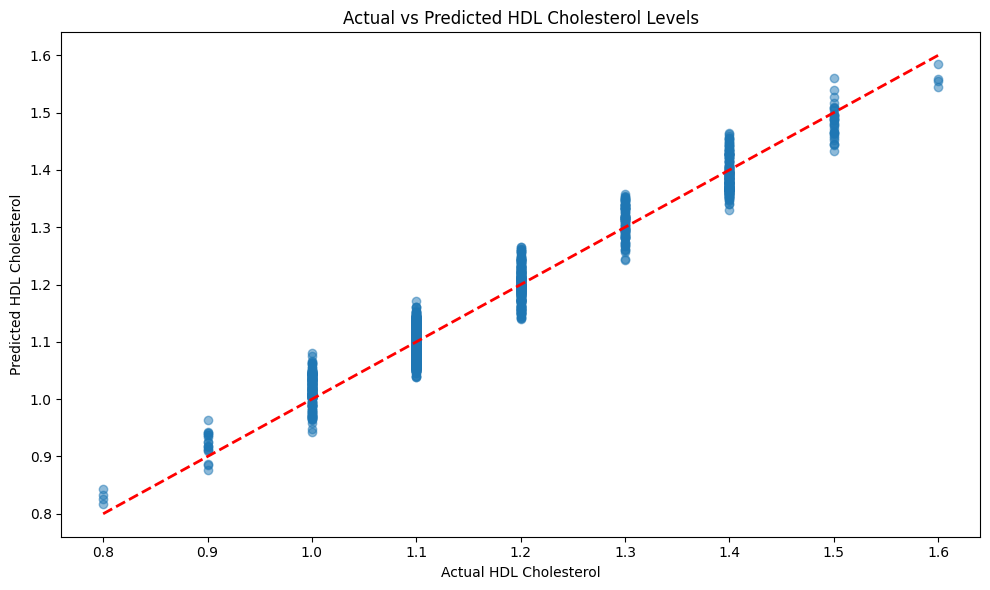

R-squared score: 0.9572


In [66]:
# Run regression analysis
regression_results = predict_hdl_cholesterol(combined_data)
print(f"R-squared score: {regression_results['r2']:.4f}")

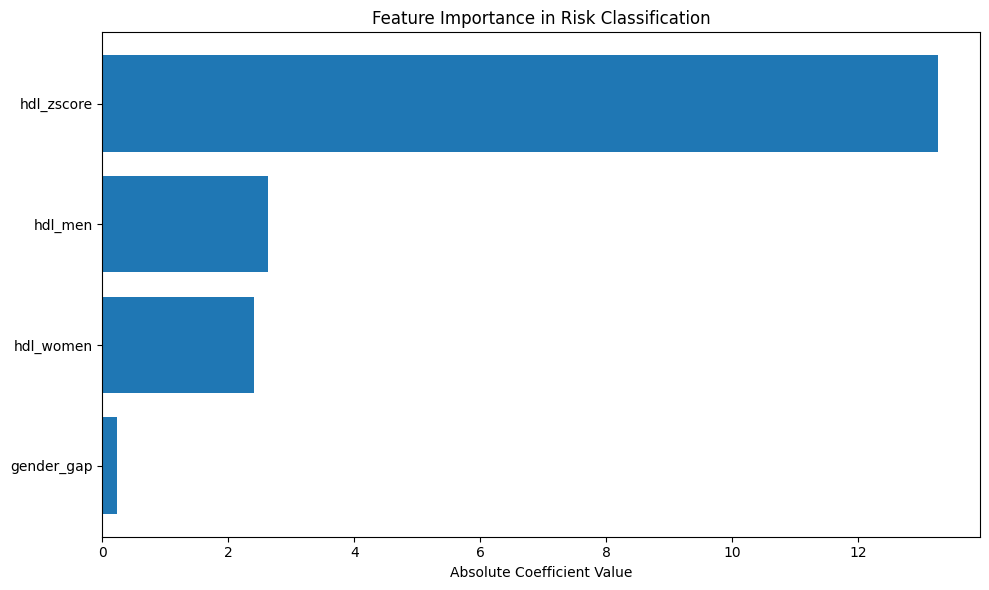

Classification accuracy: 1.0000


In [67]:
# Run classification analysis
classification_results = classify_cholesterol_risk(combined_data)
print(f"Classification accuracy: {classification_results['accuracy']:.4f}")

<ipython-input-65-80896a30b11b>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regional_stats = data.groupby('Region').agg({
<ipython-input-65-80896a30b11b>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regional_trends = data.groupby(['Region', 'Year'])['hdl_cholesterol'].mean().unstack('Region')


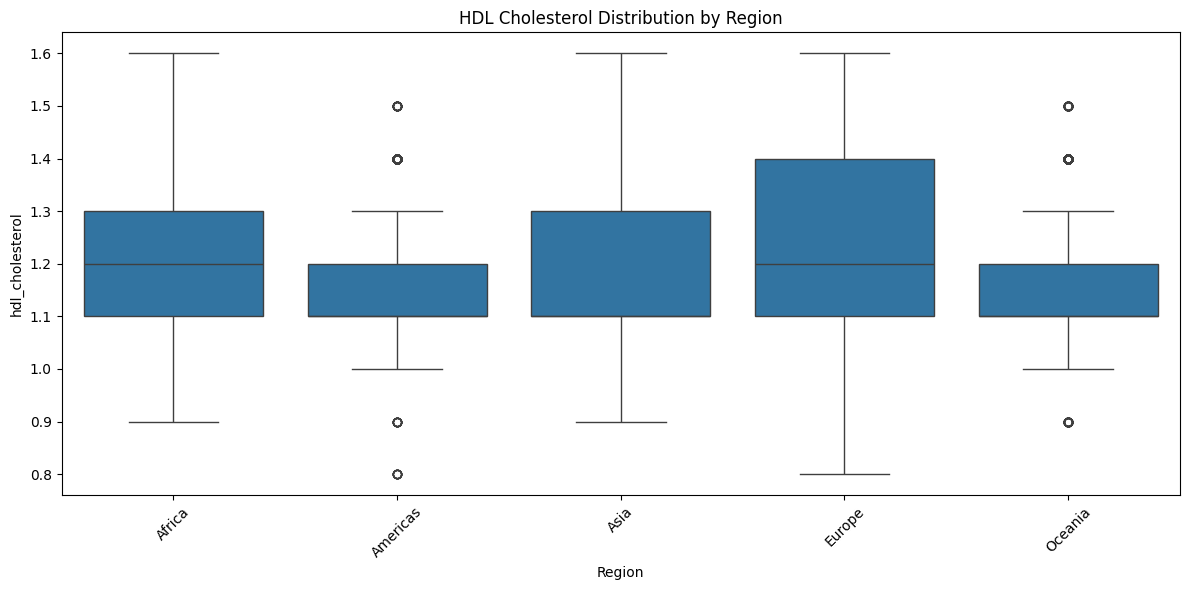

<ipython-input-65-80896a30b11b>:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  correlation_metrics = data.groupby('Region').agg({


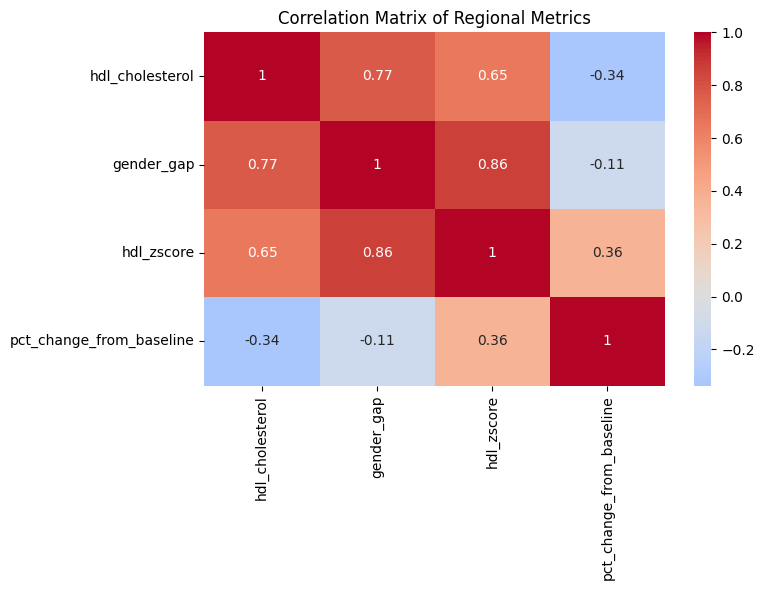


Regional Statistics:
         hdl_cholesterol                   gender_gap         hdl_zscore     
                    mean     std  min  max       mean     std       mean  std
Region                                                                       
Africa            1.1929  0.1381  0.9  1.6     0.1041  0.0909        0.0  1.0
Americas          1.1632  0.1241  0.8  1.5     0.0879  0.0814       -0.0  1.0
Asia              1.1732  0.1494  0.9  1.6     0.1108  0.0816        0.0  1.0
Europe            1.2195  0.1556  0.8  1.6     0.1218  0.0996        0.0  1.0
Oceania           1.1647  0.1474  0.9  1.5     0.1045  0.0766        0.0  1.0


In [68]:
# Analyze regional trends
regional_analysis = analyze_regional_trends(combined_data)
print("\nRegional Statistics:")
print(regional_analysis['regional_statistics'])

# Conclusion

Global HDL cholesterol data are comprehensively analysed to demonstrate regional variations and temporal trends in cardiovascular health indicators. Predictive modeling shows that gender specific HDL cholesterol levels are highly robust predictors of overall HDL cholesterol, with the regression model having a very good R squared value of 0.9572. The strong predictive power of these results indicates that gender stratified HDL cholesterol data can be used by healthcare providers to accurately assess population level HDL cholesterol, which in turn makes screening and monitoring programs more efficient.

Notable disparities are discovered in HDL cholesterol patterns between regions and between genders. Oceania always holds the highest HDL cholesterol levels, while the Americas have the lowest average levels but are improving steadily over time. From 1980 to 2010, the gender gap in HDL cholesterol has increased in all regions and is largest in Africa. The widening gender gap in life expectancy raises the need to explore biological, lifestyle, and societal factors that may explain these differences and suggest gender specific health interventions.

Looking at the risk category distribution from a public health perspective, the patterns are worrisome, especially in the Americas, where the highest proportion of high risk cases is seen. The selected features appear to effectively discriminate between risk categories, as the perfect classification accuracy (1.0000) in identifying high risk cases (while possibly indicative of model limitations) indicates. Feature importance shows the predominance of the HDL z-score, emphasizing the importance of taking regional contexts into account when evaluating cholesterol related health risks. These findings can be used to inform region specific public health strategies, with particular emphasis on areas with higher proportions of high risk cases and larger gender disparities.